# Impact of resolution and numeric schemas over trajectories predictions quality

In [1]:
import numpy as np
import xarray as xr
from math import *
from matplotlib import cm
import matplotlib.colors as colors
%matplotlib inline
from matplotlib import pyplot as plt

import stagem1.temporal_integration as sti
import stagem1.int_temp_integration as iti
import xsimlab as xs
from scipy.stats import norm

In [2]:
a=iti.SetUp()
a.analytical_comparison()

<xarray.DataArray (otime: 143, a: 100)>
array([[0.2       , 0.19919548, 0.19679487, ..., 0.19679487, 0.19919548,
        0.2       ],
       [0.1877108 , 0.19307866, 0.19694429, ..., 0.17278737, 0.18091429,
        0.1877108 ],
       [0.15362929, 0.163962  , 0.17320105, ..., 0.13032238, 0.1423574 ,
        0.15362929],
       ...,
       [0.04578578, 0.03481736, 0.02506102, ..., 0.07043323, 0.05773962,
        0.04578578],
       [0.09628832, 0.08291928, 0.06981844, ..., 0.1228103 , 0.10966862,
        0.09628832],
       [0.14682533, 0.13483519, 0.1221962 , ..., 0.16805917, 0.15796098,
        0.14682533]])
Coordinates:
  * otime      (otime) int64 0 3600 7200 10800 ... 500400 504000 507600 511200
    otime_day  (otime) float64 0.0 0.04167 0.08333 0.125 ... 5.833 5.875 5.917
  * a          (a) float64 0.0 2.02e+03 4.04e+03 ... 1.96e+05 1.98e+05 2e+05


First row: trajectories with bilinear interpolation and without interpolation  
Second row: trajectories with Lagrange interpolation and without interpolation
Third row: difference of displacement between bilinear interpolation and without interpolation trajectories
Fourth row: difference of displacement between Lagrange interpolation and without interpolation trajectories

# Displacement error
## Varying grid time step dt

In [12]:
T=[i*sti.h2s for i in [1/2,1,2,5,7,10]]

def change_dt_RK4(DT, **args):
    x=iti.SetUp(intmethod=iti.Runge_Kutta4, **args)
    y=sti.SetUp(intmethod=sti.Runge_Kutta4, **args)
    R_legend=['Bilinear interpolation', 'Lagrange interpolation','Bilinear interpolation', 'Lagrange interpolation']
    C_legend=[r"$dt=$"+str(t/3600)+'h\n CFL='+str(x['CFL']) for t in T]

    fig, axes = plt.subplots(ncols=len(T),nrows=4, figsize=(24,12),sharex='all')
    for i in range(len(T)):
        x.update_parameters(v_field__t_step=T[i], v_field__t_i=-T[i])
        x['p'].isel(a=slice(0,None,50)).plot(x='otime_day',hue='a', ax=axes[0][i], label=x.out_ds.a.isel(a=slice(0,None,50)).values)
        y['p'].isel(a=slice(0,None,50)).plot(x='otime_day',hue='a', ax=axes[0][i], label=x.out_ds.a.isel(a=slice(0,None,50)).values)
        (x['p']-y['p']).plot(x='otime_day',hue='a', ax=axes[2][i], label=x.out_ds.a.values)
        axes[0][i].set_ylabel('Displacement difference [m]')
        axes[0][i].annotate(C_legend[i], xy=(0.5, 1.05), xytext=(0, 4),xycoords='axes fraction', textcoords='offset points',size='large', ha='center', va='baseline')

    x.update_parameters(velocity__inter_method='lagrange')
    for i in range(len(T)):
        x.update_parameters(v_field__t_step=T[i])
        x['p'].isel(a=slice(0,None,50)).plot(x='otime_day', hue='a', ax=axes[1][i], label=x.out_ds.a.isel(a=slice(0,None,50)).values)
        y['p'].isel(a=slice(0,None,50)).plot(x='otime_day', hue='a', ax=axes[1][i], label=x.out_ds.a.isel(a=slice(0,None,50)).values)
        (x['p']-y['p']).plot(x='otime_day',hue='a', ax=axes[3][i], label=x.out_ds.a.values)
        axes[1][i].set_ylabel('Displacement difference [m]')
              
    ##Only one legend for all    
    lines, labels = axes[0][0].get_legend_handles_labels()
    fig.legend(lines, labels, title="Initial position [m]:", loc="upper right", bbox_transform=fig.transFigure)
    for i in range(len(T)):
        axes[0][i].get_legend().remove()
        axes[1][i].get_legend().remove()
        axes[2][i].get_legend().remove()
        axes[3][i].get_legend().remove()
    
    for j in range (4):
        axes[j,0].annotate(R_legend[j], xy=(0, 0.5), xytext=(-axes[j,0].yaxis.labelpad - 4, 0), xycoords=axes[j,0].yaxis.label, textcoords='offset points',size='large', ha='right', va='center', rotation='vertical')    

    plt.tight_layout(rect=[0,0,0.9,1])
    plt.draw()


### Unadvected case

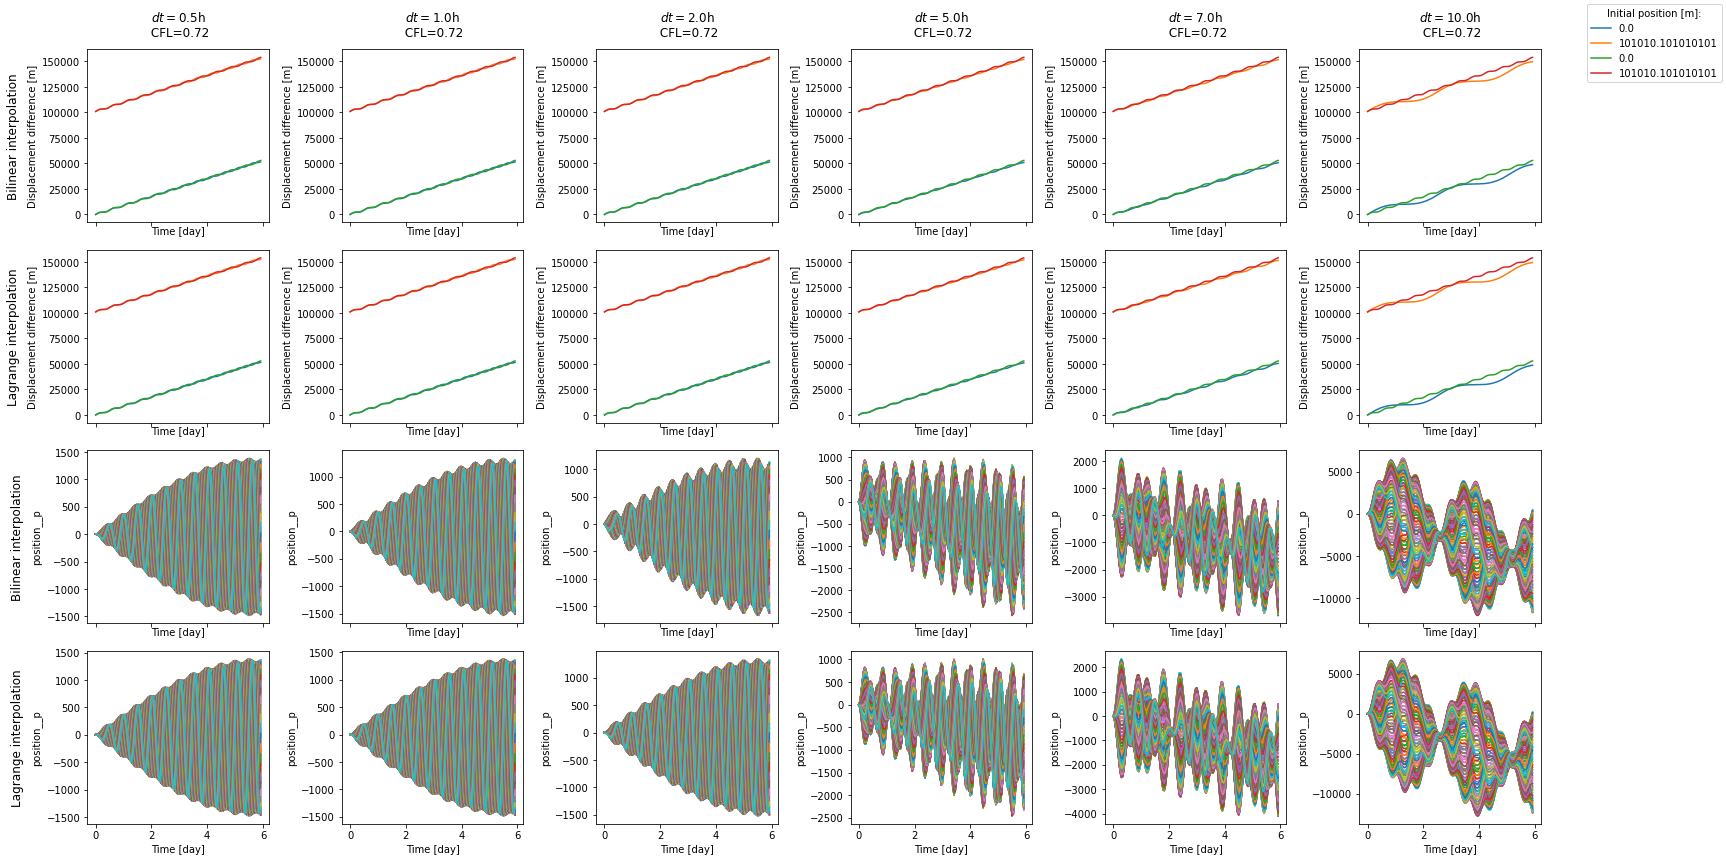

In [13]:
change_dt_RK4(T,advected=0)

#### $U_w=0$

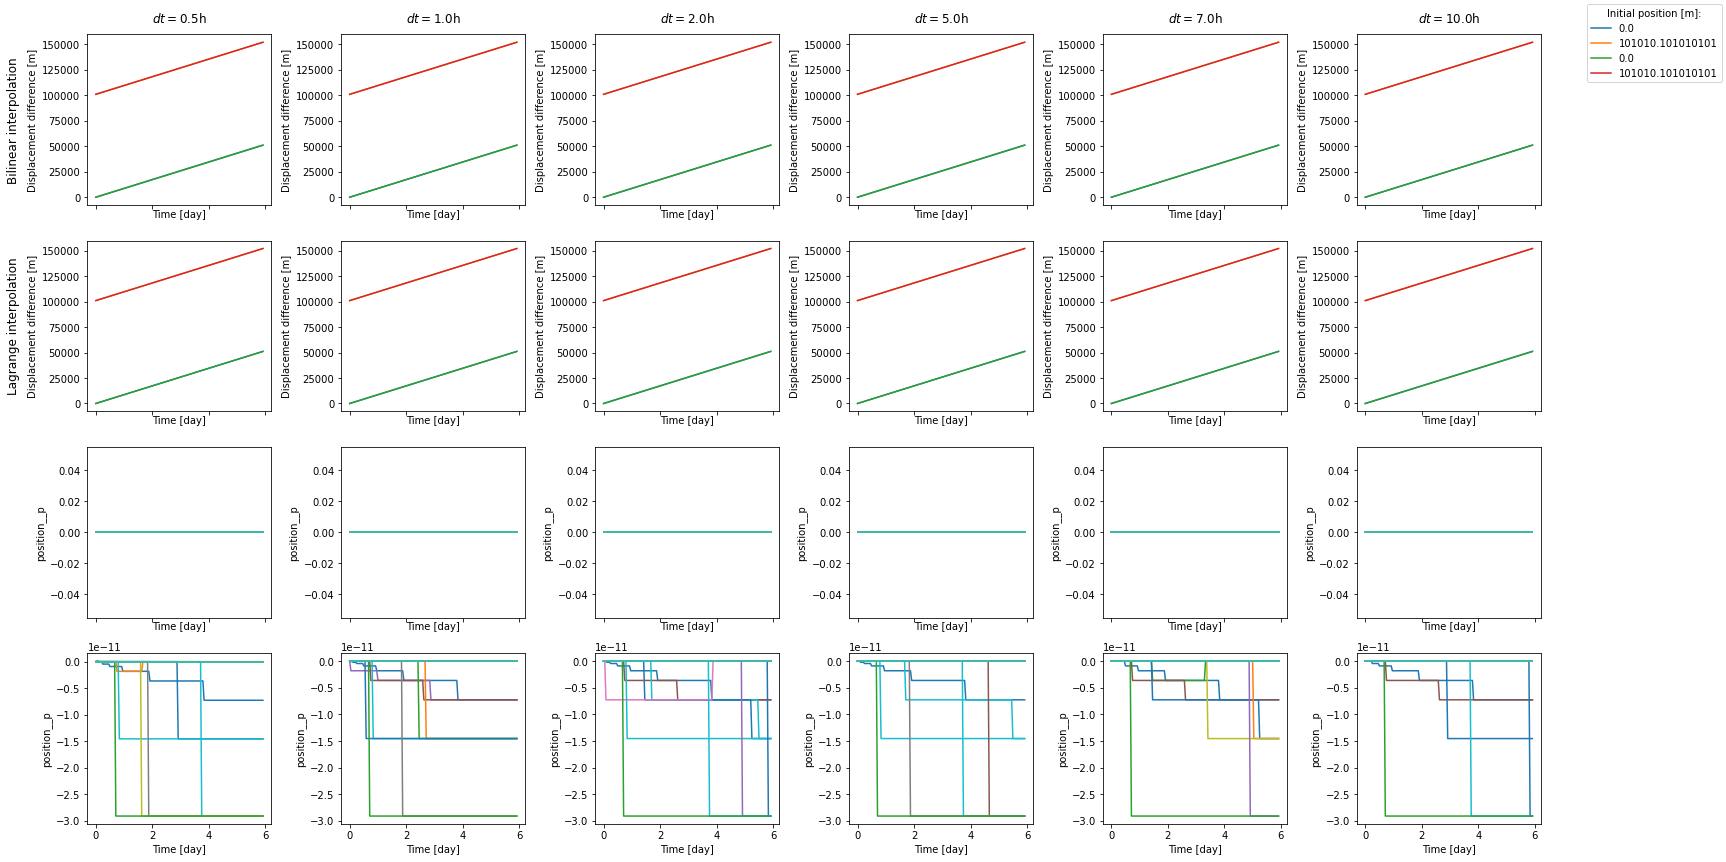

In [3]:
change_dt_RK4(T,advected=0, uw=0)

For big $\delta t$, trajectories are affected (period grows?)  
For bilinear interpolation error grows from ~1.5 m at $\delta t=0.5 h$ to ~13000 m at $\delta t=10 h$  
For Lagrange interpolation error grows from 0.001 m at $\delta t=0.5 h$ to ~13000 m at $\delta t=10 h$
The gap between Lagrange and Bilinear errors seems to be bridged as $\delta t$ grows

### Advected case

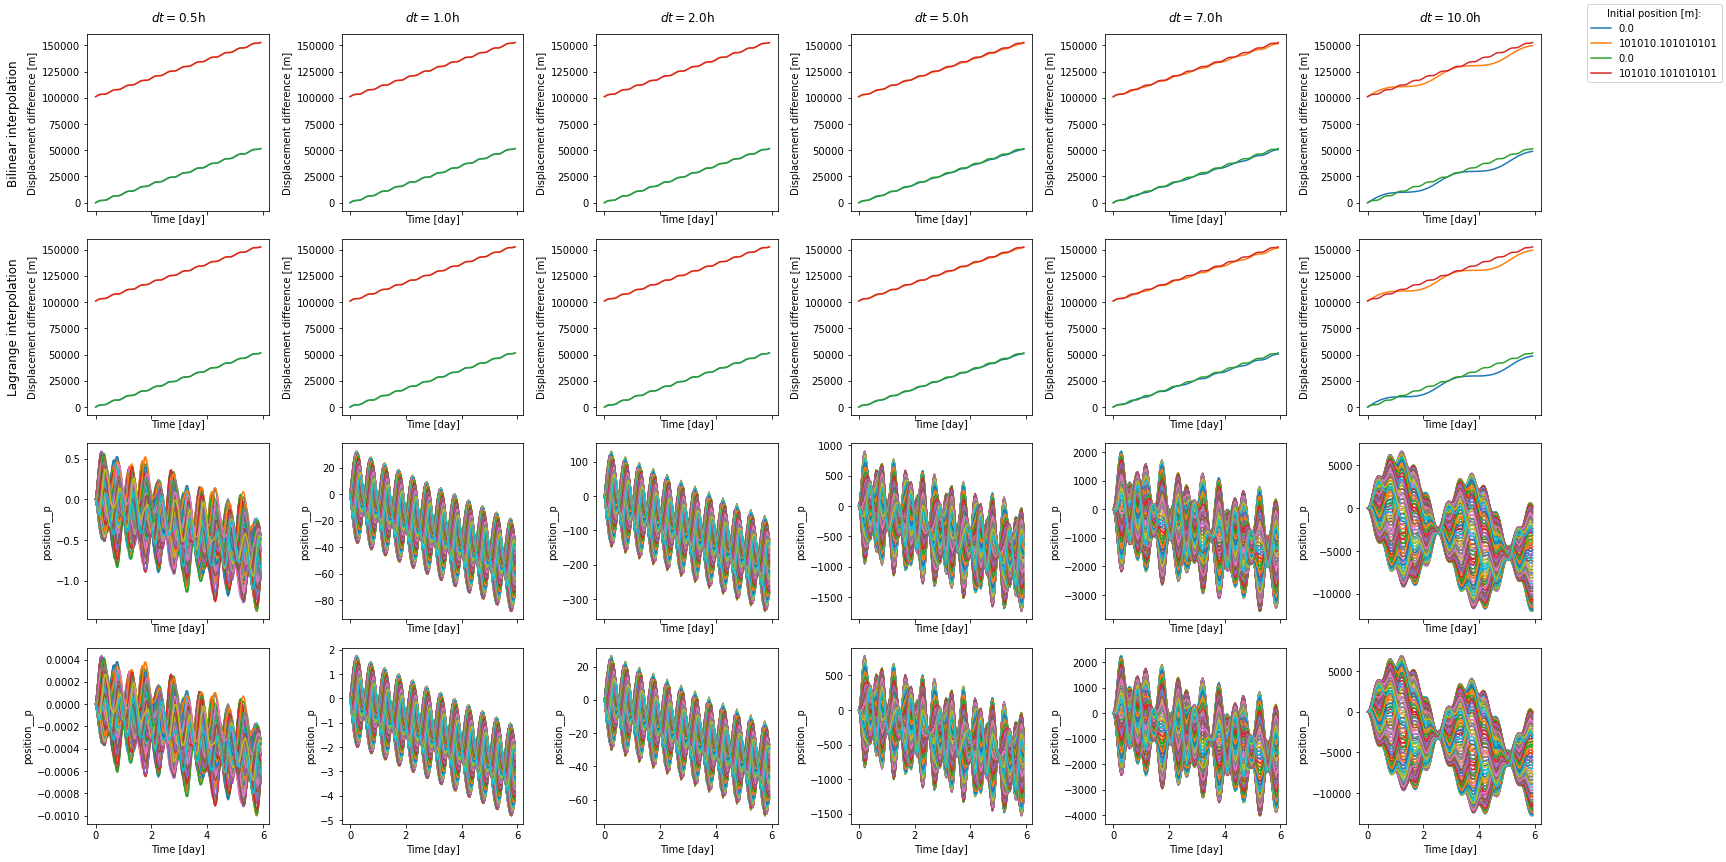

In [6]:
change_dt_RK4(T)

## In convergence domain

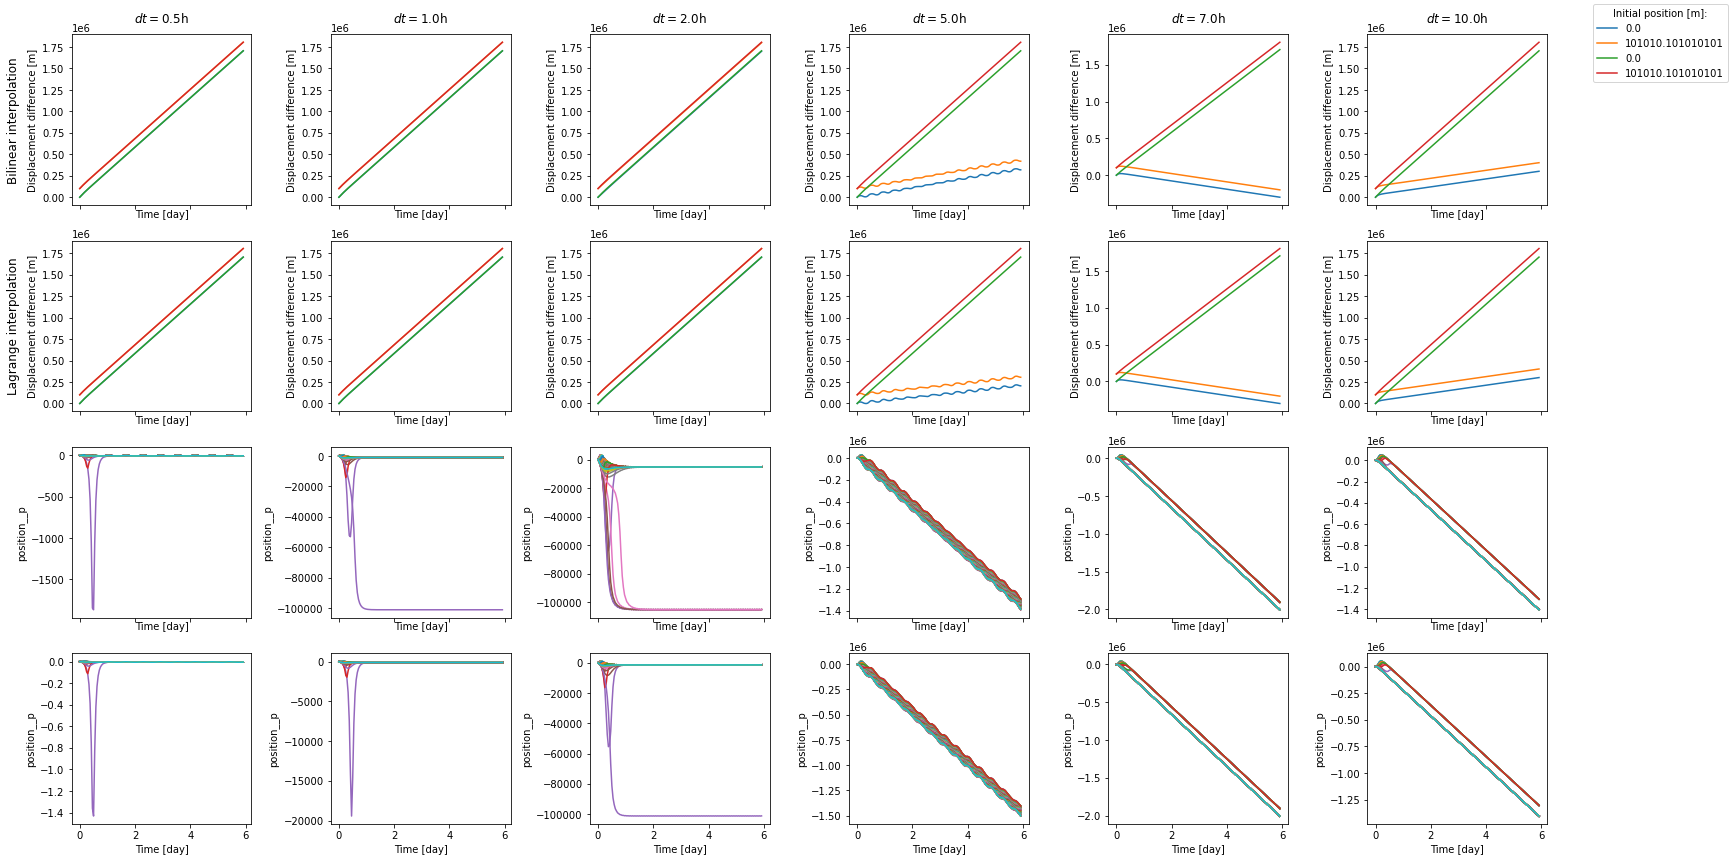

In [10]:
change_dt_RK4(T, um=1, uw=3)

# Varying Lagrangian time step $\delta t$
We want to study the impact of interpolation methods and lagrangian time step on predicted trajectories.  

`change_delta_t(DT,ODT,**args)`:
First row: trajectories with bilinear interpolation and without interpolation  
Second row: trajectories with Lagrange interpolation and without interpolation
Third row: difference of displacement between bilinear interpolation and without interpolation trajectories
Fourth row: difference of displacement between Lagrange interpolation and without interpolation trajectories

`norme_x_delta_t(DT,ODT,**args)`:
DT: time step of time; ODT: time step of otime; args: arguments to pass to x.SetUp(args)
$$||\epsilon_d||=\sqrt{<<\epsilon_d^2>_{4 jours<t<6 jours}>_{bouées}}$$ where $\epsilon_d=p_{interpolated}-p_{no-interpolated}$  
$$CFL=\frac{(U_m+U_w)\delta t}{dx}$$
First row: $||\epsilon_d||$ with bilinear interpolation depending on $\delta t$ and CFL.  
Second row: $||\epsilon_d||$ with Lagrange interpolation depending on $\delta t$ and CFL.

In [30]:
DT=[i*sti.h2s for i in [0.2,0.5,2/3,1,2,3,5]]
ODT=[i*sti.h2s for i in [1,1,2,1,2,3,5]]

def change_delta_t(DT,ODT, **args):
    T=[list(np.arange(0,sti.d2s*6, t))for t in DT]
    OT=[list(np.arange(0,sti.d2s*6-t, t))for t in ODT]
    x=iti.SetUp(intmethod=iti.Runge_Kutta4, **args)
    y=sti.SetUp(intmethod=sti.Runge_Kutta4, **args)

    R_legend=['Bilinear interpolation', 'Lagrange interpolation']
    C_legend=[r"$\delta t=$"+str(t/3600)+'h' for t in DT]

    fig, axes = plt.subplots(ncols=len(T),nrows=4, figsize=(24,12),sharex='all')
    for i in range(len(T)):
        x.update_clock(time=T[i], otime=OT[i])
        y.update_clock(time=T[i], otime=OT[i])
        x['p'].isel(a=slice(0,None,20)).plot(x='otime_day',hue='a', ax=axes[0][i], label=x.out_ds.a.isel(a=slice(0,None,20)).values)
        y['p'].isel(a=slice(0,None,20)).plot(x='otime_day',hue='a', ax=axes[0][i], label=x.out_ds.a.isel(a=slice(0,None,20)).values)
        (x['p']-y['p']).plot(x='otime_day',hue='a', ax=axes[2][i], label=x.out_ds.a.values)
        axes[2][i].set_ylabel(r'$\epsilon_d$[m]')
        axes[0][i].set_ylabel(r'$\epsilon_d$[m]')
        axes[0][i].annotate(C_legend[i]+'\n CFL='+str(x['CFL']), xy=(0.5, 1.05), xytext=(0, 4),xycoords='axes fraction', textcoords='offset points',size='large', ha='center', va='baseline')
    
    x.update_parameters(velocity__inter_method='lagrange')
    for i in range(len(T)):
        x.update_clock(time=T[i], otime=OT[i])
        y.update_clock(time=T[i], otime=OT[i])
        x['p'].isel(a=slice(0,None,20)).plot(x='otime_day', hue='a', ax=axes[1][i], label=x.out_ds.a.isel(a=slice(0,None,20)).values)
        y['p'].isel(a=slice(0,None,20)).plot(x='otime_day', hue='a', ax=axes[1][i], label=x.out_ds.a.isel(a=slice(0,None,20)).values)
        (x['p']-y['p']).plot(x='otime_day',hue='a', ax=axes[3][i], label=x.out_ds.a.values)
        axes[1][i].set_ylabel('Position [m]')
        axes[3][i].set_ylabel(r'$\epsilon_d$[m]')

    ##Only one legend for all    
    lines, labels = axes[0][0].get_legend_handles_labels()
    fig.legend(lines, labels, title="Initial position [m]:", loc="upper right", bbox_transform=fig.transFigure)
    for i in range(len(T)):
        axes[0][i].get_legend().remove()
        axes[1][i].get_legend().remove()
        axes[2][i].get_legend().remove()
        axes[3][i].get_legend().remove()
    

    for j in range (2):
        axes[j,0].annotate(R_legend[j], xy=(0, 0.5), xytext=(-axes[j,0].yaxis.labelpad - 4, 0), xycoords=axes[j,0].yaxis.label, textcoords='offset points',size='large', ha='right', va='center', rotation='vertical')    

    plt.tight_layout(rect=[0,0,0.9,1])
    plt.draw()

In [28]:
DT=[i*sti.h2s for i in [0.1,0.2,1/3,0.5,2/3,3/4,1,1.2,1.5,1.6,1.7,1.8,1.9,1.95,2,2.05,2.1,2.2,2.3,2.4,2.5,2.6,2.8,3,3.95,4,4.05,5,5.95,6,6.05]]
ODT=[i*sti.h2s for i in [1,1,1,1,2,3,1,1.2,1.5,1.6,1.7,1.8,1.9,1.95,2,2.05,2.1,2.2,2.3,2.4,2.5,2.6,2.8,3,3.95,4,4.05,5,5.95,6,6.05]]
def norme_x_delta_t(DT,ODT, **args):
    fig, axes = plt.subplots(ncols=2,nrows=2,figsize=(12,6))
    n_liste=[]
    cfl_liste=[]
    T=[list(np.arange(0,sti.d2s*6, t))for t in DT]
    OT=[list(np.arange(0,sti.d2s*6-t, t))for t in ODT]
    x=iti.SetUp(intmethod=iti.Runge_Kutta4, **args)
    y=sti.SetUp(intmethod=sti.Runge_Kutta4, **args)
    
    for i in range(len(DT)):
        x.update_clock(time=T[i], otime=OT[i])
        y.update_clock(time=T[i], otime=OT[i])
        dtamp=(x['p']-y['p'])**2
        n=np.sqrt(dtamp.where(dtamp.where(dtamp.otime<6*24*3600).otime>4*24*3600).mean('otime').mean('a'))
        n_liste.append(n)
        cfl_liste.append(x['CFL'])

    axes[0][0].plot([i/3600 for i in DT], n_liste, marker='o')
    axes[0][0].set_ylabel(r'$||\epsilon_d|| [m]$')
    axes[0][0].set_xlabel(r'$\delta t [h]$')
    axes[0][1].plot( cfl_liste,n_liste, marker='o')
    axes[0][1].set_ylabel(r'$||\epsilon_d|| [m]$')
    axes[0][1].set_xlabel('CFL')
    
    n_liste=[]
    cfl_liste=[]
    x.update_parameters(velocity__inter_method='lagrange')
    for i in range(len(DT)):
        x.update_clock(time=T[i], otime=OT[i])
        y.update_clock(time=T[i], otime=OT[i])
        dtamp=(x['p']-y['p'])**2
        n=np.sqrt(dtamp.where(dtamp.where(dtamp.otime<6*24*3600).otime>4*24*3600).mean('otime').mean('a'))
        n_liste.append(n)
        cfl_liste.append(x['CFL'])

    axes[1][0].plot([i/3600 for i in DT], n_liste, marker='o')
    axes[1][0].set_ylabel(r'$||\epsilon_d|| [m]$')
    axes[1][0].set_xlabel(r'$\delta t [h]$')
    axes[1][1].plot([i/3600 for i in DT], cfl_liste, marker='o')
    axes[1][1].set_ylabel('CFL')
    axes[1][1].set_xlabel(r'$\delta t [h]$')

    R_legend=['Bilinear interpolation', 'Lagrange interpolation']
    for j in range (2):
        axes[j,0].annotate(R_legend[j], xy=(0, 0.5), xytext=(-axes[j,0].yaxis.labelpad - 4, 0), xycoords=axes[j,0].yaxis.label, textcoords='offset points',size='large', ha='right', va='center', rotation='vertical')    


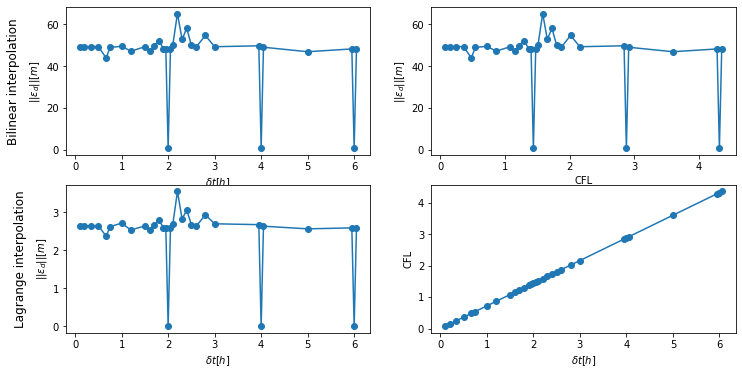

In [29]:
norme_x_delta_t(DT,ODT)

$||\epsilon_d||$ plumets for $\delta t$ a multiple of two hours, so multiple of 2*dt? 

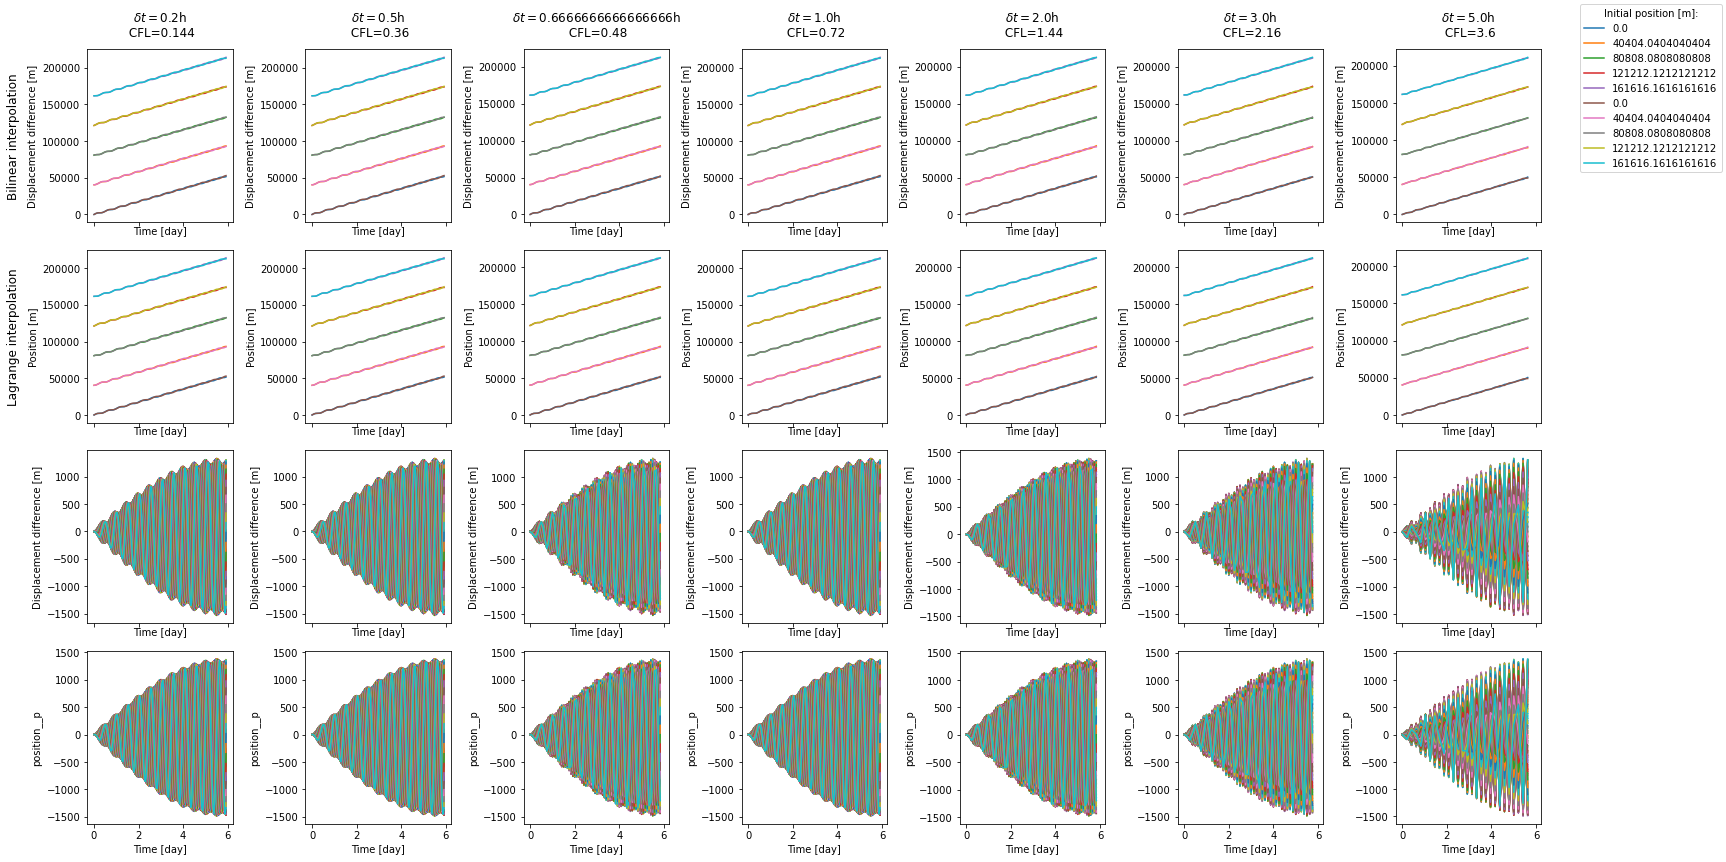

In [10]:
change_delta_t(DT,ODT, advected=0)

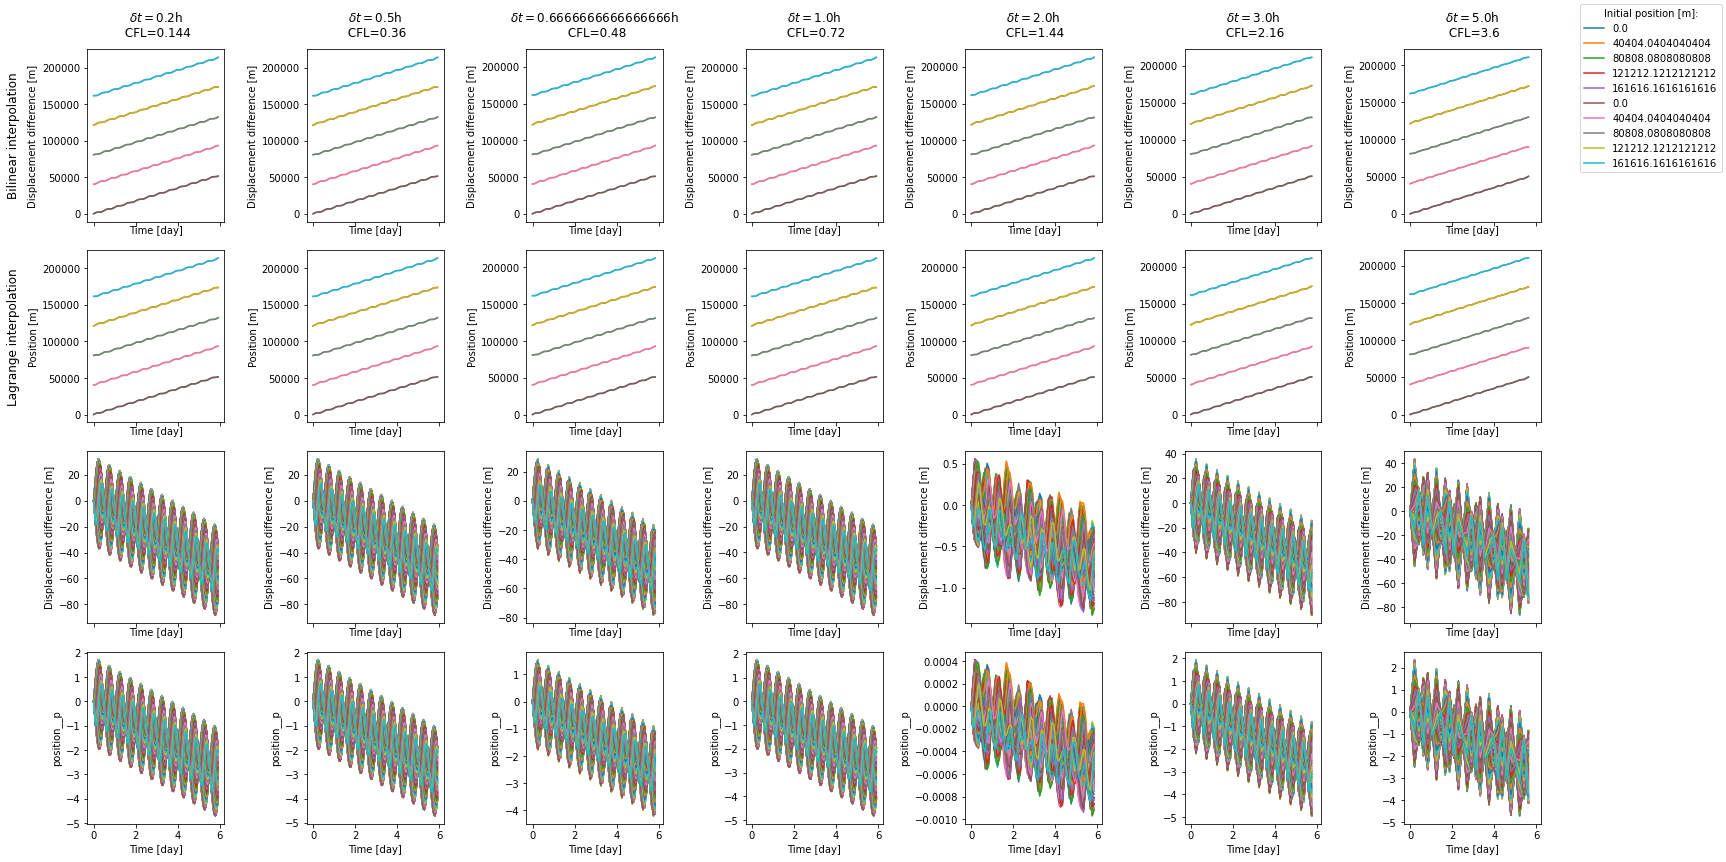

In [11]:
change_delta_t(DT,ODT)

Unadvected case:
* $\epsilon_d$ is bigger for lagrange interpolation than for bilinear interpolation ????    

Advected case:
* $\epsilon_d$ is bigger for bilinear interpolation than for lagrange interpolation (x10-x1000)
* $\epsilon_d$ evolution depending on $\delta t$ is not trivial

# Velocity error

In [16]:
DT=[i*sti.h2s for i in [0.1,0.2,0.5,2/3,1,2,3,5]]
ODT=[i*sti.h2s for i in [1,1,1,2,1,2,3,5]]

def v_change_delta_t_RK4(DT,ODT, **args):
    T=[list(np.arange(0,sti.d2s*6, t))for t in DT]
    OT=[list(np.arange(0,sti.d2s*6-t, t))for t in ODT]
    x=iti.SetUp(intmethod=iti.Runge_Kutta4, **args)

    R_legend=['Bilinear interpolation', 'Lagrange interpolation','Bilinear interpolation', 'Lagrange interpolation']
    C_legend=[r"$\delta t=$"+str(t/3600)+'h' for t in DT]

    fig, axes = plt.subplots(ncols=len(T),nrows=4, figsize=(24,12),sharex='all', sharey='row')
    for i in range(len(T)):
        x.update_clock(time=T[i], otime=OT[i])
        x['v'].isel(a=slice(0,None,50)).plot(x='otime_day',hue='a', ax=axes[0][i], label=x.out_ds.a.isel(a=slice(0,None,50)).values)
        
        y=x.analytical()
        y.isel(a=slice(0,None,50)).plot(x='otime_day',hue='a', ax=axes[0][i], label=x.out_ds.a.isel(a=slice(0,None,50)).values)
        (x['v']-y).plot(x='otime_day',hue='a', ax=axes[2][i], label=x.out_ds.a.values)
        
        
        axes[0][i].annotate(C_legend[i]+'\n CFL='+str(x['CFL']), xy=(0.5, 1.05), xytext=(0, 4),xycoords='axes fraction', textcoords='offset points',size='large', ha='center', va='baseline')
        axes[0][i].set_ylabel('Velocity [m/s]')
        axes[2][i].set_ylabel(r'$\epsilon_v$ [m/s]')

        
    x.update_parameters(velocity__inter_method='lagrange')
    for i in range(len(T)):
        x.update_clock(time=T[i], otime=OT[i])
        x['v'].isel(a=slice(0,None,50)).plot(x='otime_day',hue='a', ax=axes[1][i], label=x.out_ds.a.isel(a=slice(0,None,50)).values)
        axes[1][i].set_ylabel(r'$\epsilon_v$ [m/s]')
        y=x.analytical()
        y.isel(a=slice(0,None,50)).plot(x='otime_day',hue='a', ax=axes[1][i], label=x.out_ds.a.isel(a=slice(0,None,50)).values)
        (x['v']-y).plot(x='otime_day',hue='a', ax=axes[3][i], label=x.out_ds.a.values)
        axes[1][i].set_ylabel('Velocity [m/s]')
        axes[3][i].set_ylabel(r'$\epsilon_v$ [m/s]')
        
    ##Only one legend for all    
    lines, labels = axes[0][0].get_legend_handles_labels()
    fig.legend(lines, labels, title="Initial position [m]:", loc="upper right", bbox_transform=fig.transFigure)
    for i in range(len(T)):
        axes[0][i].get_legend().remove()
        axes[1][i].get_legend().remove()
        axes[2][i].get_legend().remove()
        axes[3][i].get_legend().remove()
    

    for j in range (4):
        axes[j,0].annotate(R_legend[j], xy=(0, 0.5), xytext=(-axes[j,0].yaxis.labelpad - 4, 0), xycoords=axes[j,0].yaxis.label, textcoords='offset points',size='large', ha='right', va='center', rotation='vertical')    

    plt.tight_layout(rect=[0,0,0.9,1])
    plt.draw()

In [25]:
DT=[i*sti.h2s for i in [0.1,0.2,1/3,0.5,2/3,3/4,0.7,0.8,0.9,0.99,1,1.01,1.2,1.5,1.6,1.7,1.8,1.9,1.99,2,2.01,2.1,2.2,2.3,2.4,2.5,2.6,2.8,2.99,3,3.01,3.99,4,4.01,4.99,5,5.01,5.99,6,6.01]]
ODT=[i*sti.h2s for i in [1,1,1,1,2,3,0.7,0.8,0.9,0.99,1,1.01,1.2,1.5,1.6,1.7,1.8,1.9,1.99,2,2.01,2.1,2.2,2.3,2.4,2.5,2.6,2.8,2.99,3,3.01,3.99,4,4.01,4.99,5,5.01,5.99,6,6.01]]
def norme_v_delta_t(DT,ODT, **args):
    fig, axes = plt.subplots(ncols=2,nrows=2,figsize=(12,6))
    n_liste=[]
    cfl_liste=[]
    T=[list(np.arange(0,sti.d2s*6, t))for t in DT]
    OT=[list(np.arange(0,sti.d2s*6-t, t))for t in ODT]
    x=iti.SetUp(intmethod=iti.Runge_Kutta4, **args)
    y=sti.SetUp(intmethod=sti.Runge_Kutta4, **args)
    
    for i in range(len(DT)):
        x.update_clock(time=T[i], otime=OT[i])
        y=x.analytical()
        dtamp=(x['v']-y)**2
        n=np.sqrt(dtamp.mean('otime').mean('a'))
        n_liste.append(n)
        cfl_liste.append(x['CFL'])

    axes[0][0].plot([i/3600 for i in DT], n_liste, marker='o')
    axes[0][0].set_ylabel(r'$||\epsilon_v|| [m]$')
    axes[0][0].set_xlabel(r'$\delta t [h]$')
    axes[0][1].plot(cfl_liste, n_liste, marker='o')
    axes[0][1].set_ylabel(r'$||\epsilon_v|| [m]$')
    axes[0][1].set_xlabel('CFL')
    
    n_liste=[]
    cfl_liste=[]
    x.update_parameters(velocity__inter_method='lagrange')
    for i in range(len(DT)):
        x.update_clock(time=T[i], otime=OT[i])
        y=x.analytical()
        dtamp=(x['v']-y)**2
        n=np.sqrt(dtamp.mean('otime').mean('a'))
        n_liste.append(n)
        cfl_liste.append(x['CFL'])

    axes[1][0].plot([i/3600 for i in DT], n_liste, marker='o')
    axes[1][0].set_ylabel(r'$||\epsilon_v|| [m]$')
    axes[1][0].set_xlabel(r'$\delta t [h]$')
    axes[1][1].plot(cfl_liste, n_liste, marker='o')
    axes[1][1].set_ylabel(r'$||\epsilon_v|| [m]$')
    axes[1][1].set_xlabel('CFL')

    R_legend=['Bilinear interpolation', 'Lagrange interpolation']
    for j in range (2):
        axes[j,0].annotate(R_legend[j], xy=(0, 0.5), xytext=(-axes[j,0].yaxis.labelpad - 4, 0), xycoords=axes[j,0].yaxis.label, textcoords='offset points',size='large', ha='right', va='center', rotation='vertical')    

    fig.suptitle(r'$||\epsilon_v|| [m]$ en fonction de $\delta t$ ou du CFL')
    plt.tight_layout()
    plt.draw()

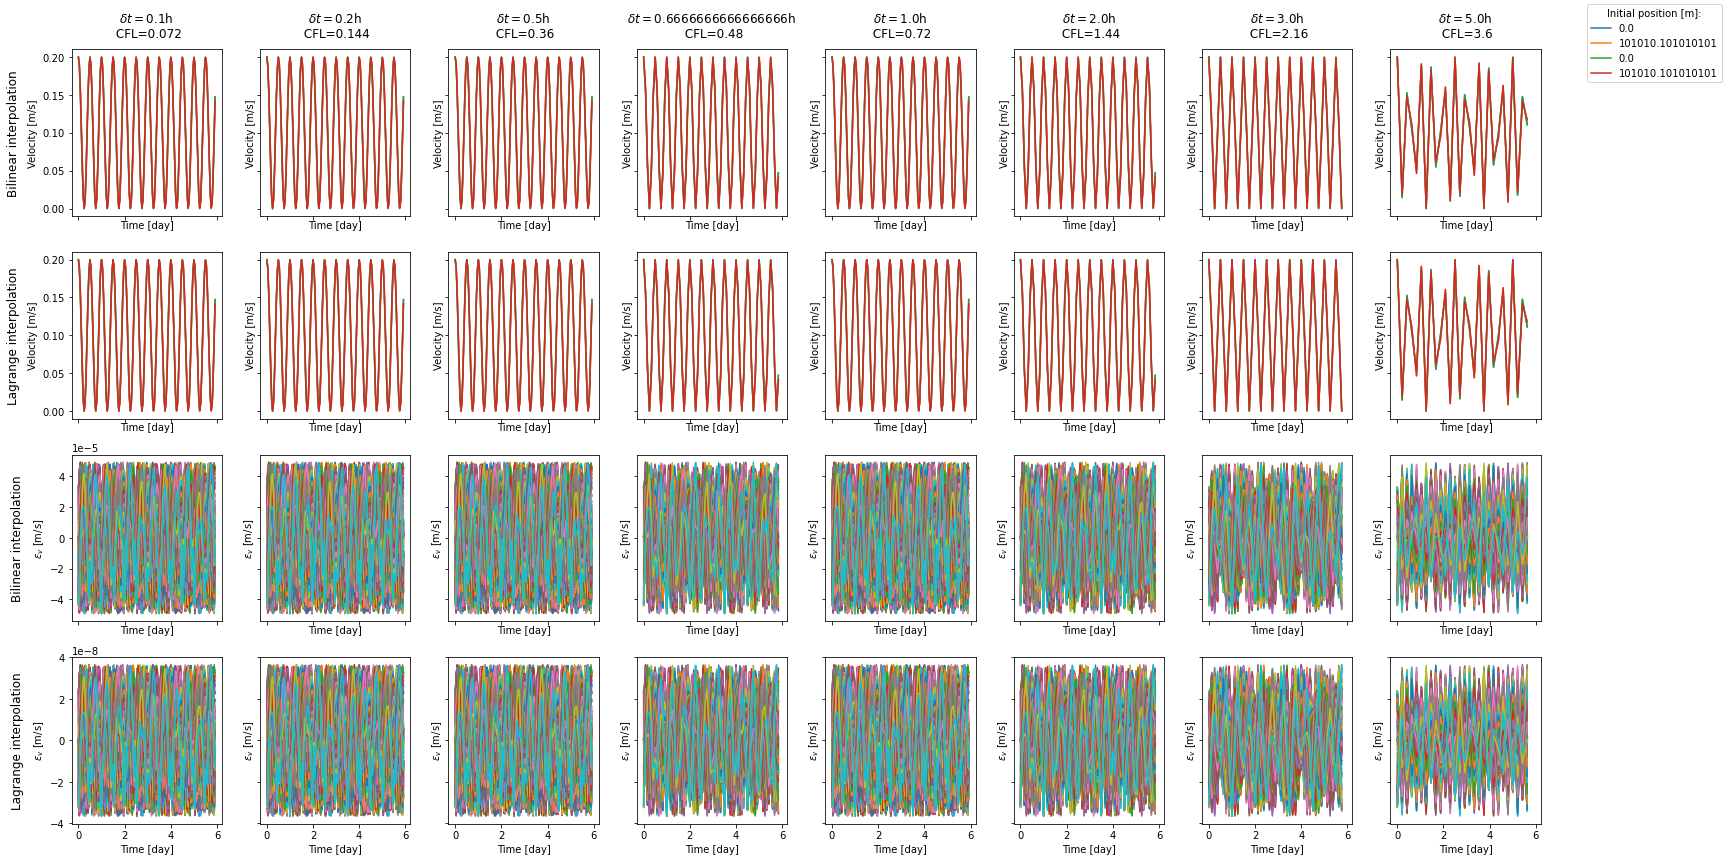

In [17]:
v_change_delta_t_RK4(DT,ODT)

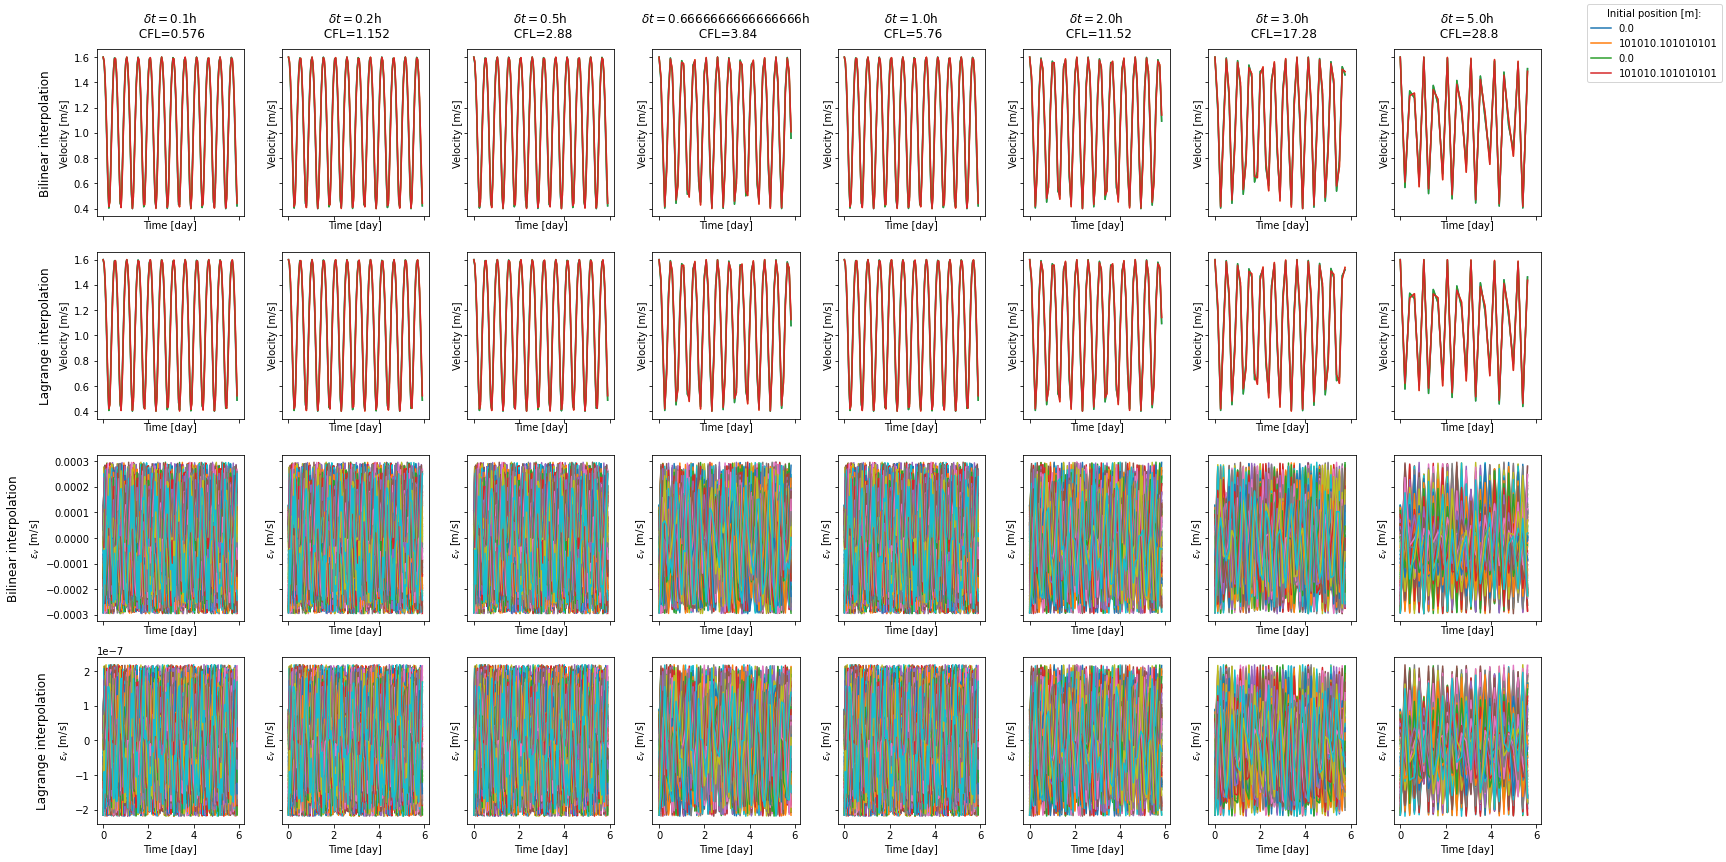

In [19]:
v_change_delta_t_RK4(DT,ODT, um=1, uw=0.6)

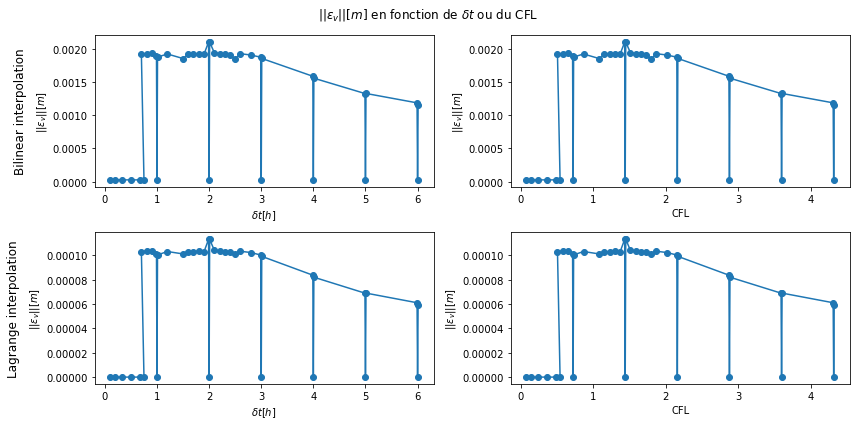

In [26]:
norme_v_delta_t(DT,ODT)

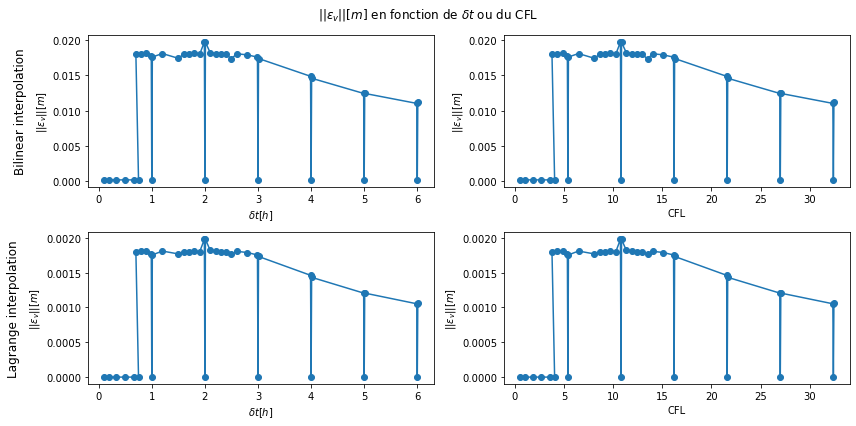

In [27]:
norme_v_delta_t(DT,ODT, um=1, uw=0.5)

* $||\epsilon_v||$ plumets for $\delta t$ multiple of an hour= dt
* $||\epsilon_v||_bilinear$~$10 \times ||\epsilon_v||_lagrange$
* do not depend on U_m and U_w
* $||\epsilon_v||$ grows for $\delta t$ around 0.7 h? for all parameters ? Do not depends on CFL??